In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('CNCnoise_1.csv', header=None)
data = data.rename(columns={0: "noise"})
data.head()

,noise
0,1911
1,1933
2,1901
3,1939
4,1914


In [ ]:
from statsmodels.tsa.seasonal import STL

stl = STL(data['noise'], period=45)
result = stl.fit()

residual = result.resid

z_scores = (residual - residual.mean()) / residual.std()
threshold = 9
data['is_outlier_STL'] = np.abs(z_scores) > threshold

<Axes: xlabel='None', ylabel='noise'>

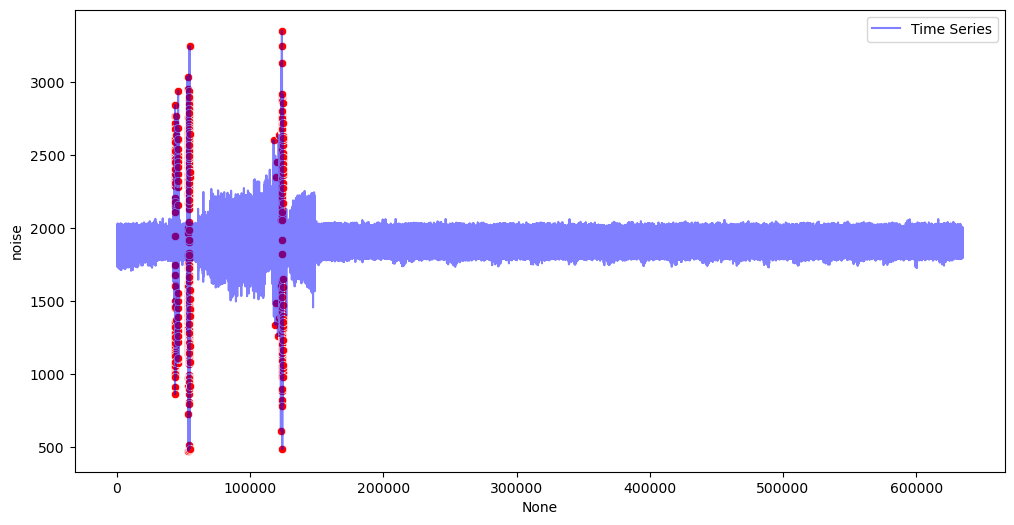

In [14]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=data.index, y=data['noise'], label='Time Series', color='blue', alpha=0.5)

# 이상치만 빨간 점으로 표시
sns.scatterplot(
    x=data.index[data['is_outlier_STL']],
    y=data['noise'][data['is_outlier_STL']],
    color='red'
)